This notebook is intended to introduce you to running ipython notebook and to familiarize you with some basics of numpy, matplotlib, and sklearn, which you'll use extensively in this course. Read through the commands, try making changes, and make sure you understand how the plots below are generated.

In your projects, you should focus on making your code as readable as possible. Use lots of comments -- see the code below -- and try to prefer clarity over compact code.

You should also familiarize yourself with the various keyboard shortcuts for moving between cells and running cells. Ctrl-ENTER runs a cell, while shift-ENTER runs a cell and advances focus to the next cell.

The first code cell just contains setup calls -- importing libraries and some other global settings to make things run smoothly.

In [1]:
# Import a bunch of libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

Start by setting the randomizer seed so results are the same each time. We'll use a random number generator later.

In [2]:
np.random.seed(100)

Generate evenly spaced X values in [0,1] using linspace.
X is a numpy array, in particular a multi-dimensional "ndarray".
Try looking at the documentation for ndarray:
http://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html

In [4]:
# How many samples to generate. Try adjusting this value.
n_samples = 50

X = np.linspace(0, 1, n_samples)

# Inspect X.
print(X)
print(type(X))
print(X.shape)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]
<class 'numpy.ndarray'>
(50,)


Let's create a "true" function that we will try to approximate with a model, below. We'll use python's lambda syntax, which makes it easy to define a simple function in a single line. See here for more details:

http://www.python-course.eu/lambda.php


In [5]:
a_function = lambda x: np.cos(1.5 * np.pi * x)

In [7]:
a_function(1)

-1.8369701987210297e-16

In [8]:
# Set the true function as a piece of a cosine curve.
true_function = lambda x: np.cos(1.5 * np.pi * x)

# Try it out. Notice that you can apply the function to a scalar or an array.
print(true_function(0))
print(true_function(0.5))
print(true_function(np.array([0, 0.5])))

1.0
-0.7071067811865475
[ 1.         -0.70710678]


Now, let's generate noisy observations of our true function. This simulates something like the situation we encounter in the real world: we observe noisy data from which we'd like to infer a model.

In [9]:
# Generate true y values.
y = true_function(X)

# Print the values of y to the nearest hundredth.
print(['%.2f' %i for i in y])

# Add random noise to y.
# The randn function samples random numbers from the standard Normal distribution.
# Multiplying adjusts the standard deviation of the distribution.
y += np.random.randn(n_samples) * 0.2

# Print the noise-added values of y for comparison.
print(['%.2f' %i for i in y])

['1.00', '1.00', '0.98', '0.96', '0.93', '0.89', '0.84', '0.78', '0.72', '0.65', '0.57', '0.49', '0.40', '0.32', '0.22', '0.13', '0.03', '-0.06', '-0.16', '-0.25', '-0.35', '-0.43', '-0.52', '-0.60', '-0.67', '-0.74', '-0.80', '-0.86', '-0.90', '-0.94', '-0.97', '-0.99', '-1.00', '-1.00', '-0.99', '-0.97', '-0.95', '-0.91', '-0.87', '-0.82', '-0.76', '-0.70', '-0.62', '-0.55', '-0.46', '-0.38', '-0.28', '-0.19', '-0.10', '-0.00']
['0.65', '1.06', '1.21', '0.91', '1.12', '0.99', '0.88', '0.57', '0.68', '0.70', '0.48', '0.58', '0.29', '0.48', '0.36', '0.11', '-0.07', '0.14', '-0.25', '-0.48', '-0.02', '-0.13', '-0.57', '-0.77', '-0.64', '-0.55', '-0.66', '-0.58', '-0.97', '-0.93', '-0.92', '-1.28', '-1.15', '-0.84', '-0.84', '-1.07', '-0.71', '-1.25', '-1.14', '-1.07', '-0.87', '-0.83', '-0.62', '-0.67', '-0.20', '-0.72', '-0.48', '-0.12', '-0.42', '0.29']


Ok. Now we have some outputs, y, that we want to predict, and some inputs X. In general, our outputs (in this course) will always be 1-dimensional. Our inputs will usually have more than 1 dimension -- we'll call these our features. But here, for simplicity, we have just a single feature. 

Since the machine learning classes in sklearn expect input feature vectors, we need to turn each input x in X into a feature vector [x].

In [10]:
# Another way to do this is np.transpose([X]). Read more about array indexing for details.
X = X[:, np.newaxis]
print(X)

[[0.        ]
 [0.02040816]
 [0.04081633]
 [0.06122449]
 [0.08163265]
 [0.10204082]
 [0.12244898]
 [0.14285714]
 [0.16326531]
 [0.18367347]
 [0.20408163]
 [0.2244898 ]
 [0.24489796]
 [0.26530612]
 [0.28571429]
 [0.30612245]
 [0.32653061]
 [0.34693878]
 [0.36734694]
 [0.3877551 ]
 [0.40816327]
 [0.42857143]
 [0.44897959]
 [0.46938776]
 [0.48979592]
 [0.51020408]
 [0.53061224]
 [0.55102041]
 [0.57142857]
 [0.59183673]
 [0.6122449 ]
 [0.63265306]
 [0.65306122]
 [0.67346939]
 [0.69387755]
 [0.71428571]
 [0.73469388]
 [0.75510204]
 [0.7755102 ]
 [0.79591837]
 [0.81632653]
 [0.83673469]
 [0.85714286]
 [0.87755102]
 [0.89795918]
 [0.91836735]
 [0.93877551]
 [0.95918367]
 [0.97959184]
 [1.        ]]


In [14]:
X.shape

(50, 1)

Since you're already familiar with linear regression, let's try that first. Check out the sklearn documentation for linear regression:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:
# Try setting fit_intercept=False as well.
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
print(lr.intercept_)
print(lr.coef_)
print('Estimated function: y = %.2f + %.2fx' %(lr.intercept_, lr.coef_[0]))

0.7302894670660811
[-1.87250352]
Estimated function: y = 0.73 + -1.87x


Approximating a cosine function with a linear model doesn't work so well. By adding polynomial transformations of our feature(s), we can fit more complex functions. This is often called polynomial regression. Take a look at the sklearn documentation for the PolynomialFeatures preprocessor:

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

You'll notice that the sklearn classes have many of the same function names like fit() and fit_transform().

In [16]:
# Try increasing the degree past 2.
poly = PolynomialFeatures(degree=2, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[0.00000000e+00 0.00000000e+00]
 [2.04081633e-02 4.16493128e-04]
 [4.08163265e-02 1.66597251e-03]
 [6.12244898e-02 3.74843815e-03]
 [8.16326531e-02 6.66389005e-03]
 [1.02040816e-01 1.04123282e-02]
 [1.22448980e-01 1.49937526e-02]
 [1.42857143e-01 2.04081633e-02]
 [1.63265306e-01 2.66555602e-02]
 [1.83673469e-01 3.37359434e-02]
 [2.04081633e-01 4.16493128e-02]
 [2.24489796e-01 5.03956685e-02]
 [2.44897959e-01 5.99750104e-02]
 [2.65306122e-01 7.03873386e-02]
 [2.85714286e-01 8.16326531e-02]
 [3.06122449e-01 9.37109538e-02]
 [3.26530612e-01 1.06622241e-01]
 [3.46938776e-01 1.20366514e-01]
 [3.67346939e-01 1.34943773e-01]
 [3.87755102e-01 1.50354019e-01]
 [4.08163265e-01 1.66597251e-01]
 [4.28571429e-01 1.83673469e-01]
 [4.48979592e-01 2.01582674e-01]
 [4.69387755e-01 2.20324865e-01]
 [4.89795918e-01 2.39900042e-01]
 [5.10204082e-01 2.60308205e-01]
 [5.30612245e-01 2.81549354e-01]
 [5.51020408e-01 3.03623490e-01]
 [5.71428571e-01 3.26530612e-01]
 [5.91836735e-01 3.50270721e-01]
 [6.122448

Now let's fit a linear model where the input features are (x, x^2).

In [9]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X2, y)
print (lr.intercept_)
print (lr.coef_)
print ('Estimated function: y = %.2f + %.2fx0 + %.2fx1' %(lr.intercept_, lr.coef_[0], lr.coef_[1]))

1.3886978602822184
[-6.188241    4.46974938]
Estimated function: y = 1.39 + -6.19x0 + 4.47x1


Let's put everything together and try some plotting. We can use sklearn's Pipeline framework to connect the 2 operations, PolynomialFeatures and LinearRegression, both of which have a fit() method.

In [20]:
degrees = [1, 4, 15]
len(degrees)
range(3)

range(0, 3)

In [21]:
list(range(3))

[0, 1, 2]

In [23]:
help(np.newaxis)

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



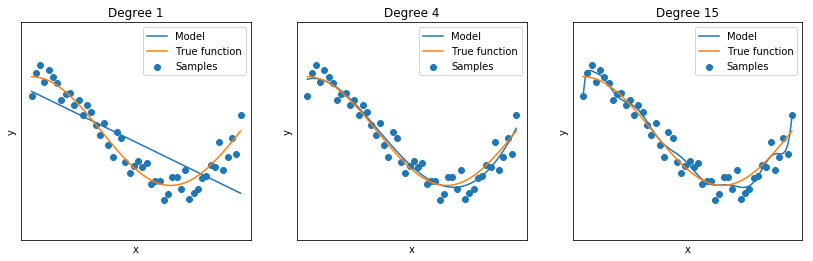

In [24]:
# Below, we'll fit polynomials to the noisy data with these degrees.
degrees = [1, 4, 15]

# Initialize a new plot.
plt.figure(figsize=(14, 4))

# We'll create a subplot for each value of the degrees list.
for i in range(len(degrees)):
    # The subplots are all on the same row.
    ax = plt.subplot(1, len(degrees), i+1)
    
    # Turn off tick marks to keep things clean.
    plt.setp(ax, xticks=(), yticks=())

    # Set up the polynomial features preprocessor.
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)

    # Use the sklearn's Pipeline to string together 2 operations.
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

    pipeline.fit(X, y)
    
    # Show samples from the fitted function.
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")

    # Show the true function.
    plt.plot(X_test, true_function(X_test), label="True function")

    # Show the original noisy samples.
    plt.scatter(X, y, label="Samples")

    # Add a few more labels to the plot.
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((-.05, 1.05))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree %d" % degrees[i])

# Render the plots.
plt.show()

The machine learning lesson here is that we are interested in the smallest model that fits our data the best. Clearly, the degree 1 model, while very small (only 2 parameters), doesn't fit the observed data well. The degree 15 model fits the observed data extremely well, but is unlikely to generalize to new data. This is a case of "over-fitting", which often happens when we try to estimate too many parameters from just a few examples. The degree 4 model appears to be a good blend of small model size and good generalization.